# K-means

This is Noor Aldeen Almusleh's work for coding assignment \#1
## Question:

Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be 100s), write a function that calculates simple K-means. The expected returned value from the function is

1. a set of cluster id that each point belongs to, and
2. coordinates of centroids at the end of the iterations

Please use Python with standard libraries like numpy or pandas, but do not use Scikit-learn's k-means or any other k-means library, the idea is for you to implement k-means from scratch. Feel free to research and look up any information you need, but please note plagiarism will not be tolerated. You may spend as much time as needed, but as a frame of reference, an hour would be the maximum time frame. If more time is required, please send over the intermediate code at the one hour mark.

You may start the assignment whenever you are ready. Once you have completed this task, get back to us along with the code and how long it took you. Please feel free to get in touch with me if you encounter any questions or problems.

**Requirements**:

Minimum: implementation of the k-means function/class

Expected:

- Implement an interface similar to Sklearn (subset is fine)
- Test code
- Visualisation

**Deliverable**: Notebook with explanation and HTML output. Try to organise it with the following suggested sections:

- K-means function/class
- Test
- Visualisation

## Code outline:
Part 1: Kmeans algorithm implemntation.

Part 2: Tesdting the code with two differnet data sets.

Part 3: Visulaizing the clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1:
The first part of the code has Kmean functions implemntations, each function has a few comments to help reading the code. There are four steps in this part; defining some functions to be used, initializing the centroids, getting the labels of each cluster, and updating the coordinates of the centroids.

#### Step 1: Some useful functions

In [2]:
# To convert np arrays to tuples
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

In [18]:
# To get the range of the points on the x and y axes
def random_centroid(low, high):
    return low+(high-low) * np.random.random()

#### Step 2: Initialize the centroids

In [4]:
# Initialize the centroids
def centroid_init(K):
    """input:
    k: number of centroids
    output:
    U: initial location of the centroids"""
    # Create an empty list to store the centroids
    U = []
    for i in range(K):
        # Generate the coordinates of the centroid
        u_x = random_centroid(min(x), max(x))
        u_y = random_centroid(min(y),max(y))

        # Create the centroid
        u = (u_x, u_y)

        # Store the new centroid
        U.append(u)
        
    return U

#### Step 3: The Argmin function
This function will give us the labels of each point as well as the coordinates of the points so we can draw them later.

In [5]:
def ArgMin(points, k, U):
    """
    input:
    points: the points you want to cluster
    k: the number of centroids
    U: a list of centroids locations
    
    output:
    Centroids: list of lists of points corresponding to each centroid in U respectivally
    Lable: list of lists of indecies corresponding to each centroid in U respectivally
    """
    # Define a list of centroids
    Centroids = []
    # Create a list of the labels of the points in each cluster
    for i in range(k):
        Centroids.append([])
    
    distances = {}
    Label = []
    
    for i in range(len(points)):
        for j in range(k):
            # To find the distance between a point and a centroid
            d_x = np.power(points[i][0] - U[j][0], 2)
            d_y = np.power(points[i][1] - U[j][1], 2)

            d = np.power(d_x + d_y, 0.5)

            # Store the distance between a point and each centroid {centroid label: distance form it}
            distances[j] = d

            # Compare between the distances
            d_referance = float('inf')
            for label, distance in distances.items():
                if distance < d_referance:
                    d_referance = distance
                    l = label
        Centroids[l].append(points[i])
        Label.append(l)
    
    return Centroids, Label

#### Step 4: Updating the location of the centroids

In [6]:
def U_update(Centroids, U):
    """
    input:
    U: a list of centroids locations
    Centroids: list of lists of points corresponding to each centroid in U respectivally    
    output:
    Centroids: an updated list of lists of points corresponding to each centroid in U respectivally
    """
    for j in range(k):
        # Get the new x and y coordinates for a centroid
        c_x = [x for x,y in C[j]]
        c_y = [y for x,y in C[j]]

        # Store the new position of the centroid
        U[j]=tuple([sum(c_x)/len(c_x), sum(c_y)/len(c_y)])
    
    return U

### Part 2:
In this part we generate some data to test the algorthim implemented above.

In [7]:
# Generate random points
x = np.random.uniform(low=0, high=100, size=100).tolist()
y = np.random.uniform(low=0, high=100, size=100).tolist()

# Create a list to store the random points
points = []
for i in range(len(x)):
    points.append((x[i], y[i]))

The following data was used to check the code, and it was adopted from an old project I worked on before. It has four clusters in it, and their overlap is not as strong as the data above.

In [9]:
# Shuffle the list to avoid any bias
np.random.shuffle(points)

In [10]:
# Get the x and y components of each point from the passed points
x = [x for x,y in points]
y = [y for x,y in points]

You can change the number of centroids here and see how the resulting labels and plot (see below) will change.

In [11]:
# Number of centroids
k = 4

In [12]:
# Get the inital location of the centroids 
U = centroid_init(k)

### Part 3:
This part uses the data generated from part 2 in the algorithm implemnted in part 1 to test it. The next cell will keep looping until the location of centroids will stop changing.

In [19]:
u_old = u_old2 = []
for i in range(k):
    u_old.append((0,0))    
    u_old2.append((0,0))

# Repeate until converge    
while u_old2 != U:
    u_old2 = u_old
    
    # Get a list of clasified points and labels
    C, Labels = ArgMin(points, k, U)
    # Update the centroids locations
    try:
        u_old = U_update(C,U)
    except(ZeroDivisionError):
        U = centroid_init(k)
        C, Labels = ArgMin(points, k, U)
        continue

    
    U = u_old


## <span style="color:red"> The next two cells are showing the labels and the coordinates of the centroids.</span>

In [14]:
# Print the labels
Labels_array = np.array(Labels).T
Labels_array

array([1, 2, 2, 2, 1, 0, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 3, 2, 2, 2, 2,
       3, 0, 2, 1, 2, 1, 3, 0, 1, 1, 3, 2, 3, 2, 0, 0, 1, 2, 3, 3, 3, 2,
       0, 1, 2, 2, 3, 3, 3, 2, 1, 3, 3, 0, 3, 0, 3, 3, 3, 1, 2, 3, 2, 0,
       0, 3, 3, 3, 1, 0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 3, 1, 0, 3, 3, 2, 2,
       2, 1, 1, 2, 2, 0, 3, 2, 3, 0, 0, 1])

In [15]:
# coordinates of the centroids
U

[(81.38796019375158, 88.46302009797921),
 (20.451590098780716, 74.743983965438),
 (28.185506592277367, 19.153036711041327),
 (72.20178632128312, 36.373748868733905)]

### Part 4:
This is the last part of the code, and it's visualizing the clustering. Notice that the centroids are slightly transparent and bigger than the rest of the points so they are clearer.

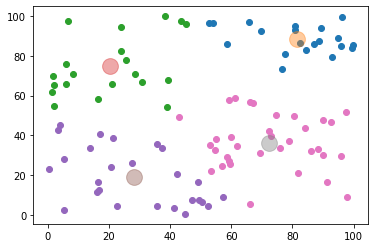

In [21]:
# Visuilize the clustured data
for j in range(k):
    # Plot the points
    plt.scatter(*zip(*C[j]))
    # Plot the centroids
    plt.scatter(*zip(U[j]), s=250, alpha=0.4)
    